## Bienvenido al desafío de Inteligencia Artificial!

A continuación verás las consignas de cuatro ejercicios con distintas dificultades sobre tareas de Computer Vision y Natural Language Processing. Tu objetivo es resolver **al menos dos de estos ejercicios** utilizando el framework de tu preferencia (a menos que se especifique lo contrario) y que puedas explicar en el video las distintas decisiones, dificultades y teoría que consideres relevante.

Mucha suerte!

### Se explicarán las distintas decisiones tomadas y los detalles necesarios en un vídeo

**Explicación de las resoluciones en el siguiente vídeo:**

[LINK A LA EXPLICACION](https://youtu.be/szDud-vsr1A?si=EOyt9TNZdHZBOf4H)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from keras.datasets import mnist

(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()


## Ejercicio 1 - Computer Vision: Image Classification

**Consigna**: Construí y entrená una arquitectura convolucional para resolver el problema de clasificación del dataset MNIST. Exhibí los resultados como prefieras. El dataset está disponible en el entorno en las variables X_train_mnist, X_test_mnist, y_train_mnist y y_test_mnist.

* Considerá explicar las distintas partes del código y decisiones de la arquitectura en el video.

In [2]:
print( X_train_mnist.shape )

print( X_train_mnist.dtype ) 

# Los valores deben estar en float32 y el tensor debe ser de forma muestras, alto, ancho, canal de colores = 1 (blanco y negro)

(60000, 28, 28)
uint8


In [3]:
print('FORMATO DE X')
print( X_train_mnist[0] ) # Hay que dejar en blanco y negro los colores (todo valor debe quedar entre 0 y 1)

print('\n FORMATO DE Y')
print(y_train_mnist) # Hay que hacer categóricas las variables

FORMATO DE X
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

Formateo

In [4]:
# Agregamos el canal de colores al array

X_train_mnist = X_train_mnist.reshape( X_train_mnist.shape[0], 28, 28, 1 )
X_test_mnist = X_test_mnist.reshape( X_test_mnist.shape[0], 28, 28, 1 )

# Cambiamos el tipo de dato a float 32 (por precisión y compatibilidad) y dejamos en 1 o 0 los valores de X

X_train_mnist = X_train_mnist.astype('float32') / 255
X_test_mnist = X_test_mnist.astype('float32') / 255


# Hacemos categóricas las variables usando one hot encoding  (to_categorical)

y_train_mnist = keras.utils.to_categorical(y_train_mnist)
y_test_mnist = keras.utils.to_categorical(y_test_mnist)



In [26]:
print( y_train_mnist[0] )


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


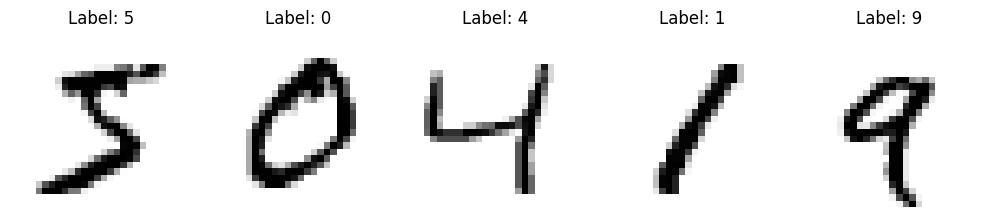

In [27]:
import matplotlib.pyplot as plt


rows=1
cols=5
images, labels = X_train_mnist[:5], y_train_mnist[:5]


fig, axes = plt.subplots(rows, cols, figsize=(10, 3))
axes = axes.flatten()
for i, (image, label) in enumerate(zip(images, labels)):
    axes[i].imshow(image.reshape(28, 28), cmap='gray_r')
    axes[i].axis('off')
    axes[i].set_title(f'Label: {label.argmax()}')
plt.tight_layout()
plt.show()


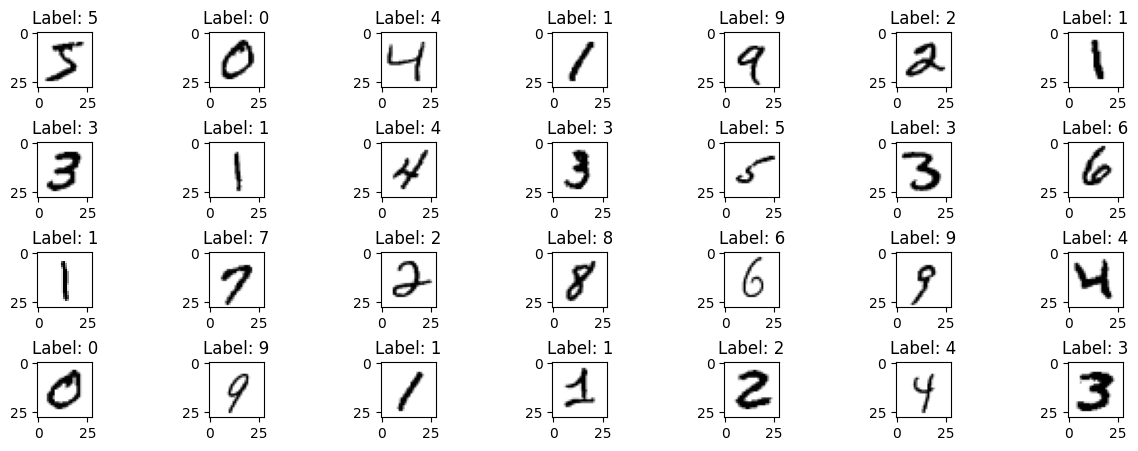

In [30]:
import matplotlib.pyplot as plt

rows = 4
cols = 7

images = X_train_mnist[:rows * cols]
labels = y_train_mnist[:rows * cols]

fig, axes = plt.subplots(rows, cols, figsize=(15, 5), squeeze=False)
fig.subplots_adjust(hspace=1, wspace=0.3)  # Ajuste de espaciado vertical y horizontal

for i, (image, label) in enumerate(zip(images, labels)):
    row_index = i // cols
    col_index = i % cols
    ax = axes[row_index, col_index]
    ax.imshow(image.reshape(28, 28), cmap='gray_r')
    ax.set_title(f'Label: {label.argmax()}')

plt.show()


In [117]:

model_1 = keras.models.Sequential(
    [
    # Neurona de entrada
    Conv2D(20, (3,3), activation= 'relu', input_shape = (28 , 28 ,1 )),
    MaxPooling2D(2,2),
    
    Conv2D(40, (3,3), activation= 'relu'),
    MaxPooling2D(2,2),
    
    Dropout(0.5),
    
    
    Flatten(),
    Dense(30, activation='relu'),
    
    # Neurona de sálida con softmax indicando probabilidad
    Dense(10, activation='softmax')
    
    
    ])

model_1.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 20)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 40)        7240      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 40)          0         
 ng2D)                                                           
                                                                 
 dropout (Dropout)           (None, 5, 5, 40)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0

In [118]:
# Compilamos el modelo con el optimizer adam, como métrica accuracy y la función de pérdida será categorical_crossentropy que es eficaz en multiclase

model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [119]:
batch_size = 32


history = model_1.fit(
    X_train_mnist, y_train_mnist,
    epochs = 10,
    
    # Dividimos en lotes y especificamos los datos de validación y los pasos por época y de validación
    
    batch_size = batch_size,
    validation_data = (X_test_mnist, y_test_mnist),
    validation_steps= int( len(X_test_mnist) / batch_size ),
    steps_per_epoch = int( len(X_train_mnist) / batch_size )
)

Epoch 1/10



1875/1875 [==============================] - 16s 6ms/step - loss: 0.2464 - accuracy: 0.9226 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0887 - accuracy: 0.9727 - val_loss: 0.0408 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0690 - accuracy: 0.9784 - val_loss: 0.0346 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0304 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0533 - accuracy: 0.9831 - val_loss: 0.0267 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0487 - accuracy: 0.9845 - val_loss: 0.0270 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0448 - accuracy: 0.9861 - val_loss: 0.0246 - val_accuracy: 0.9

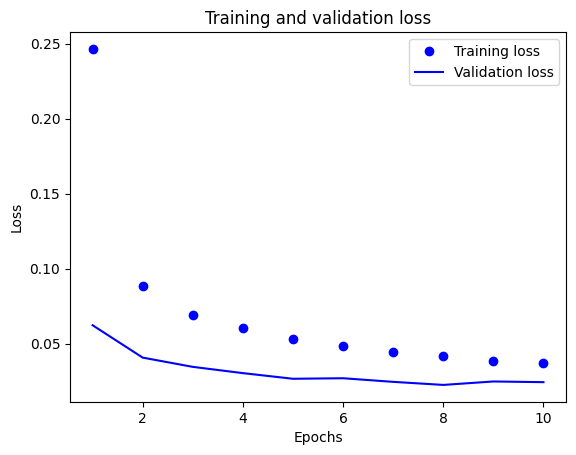

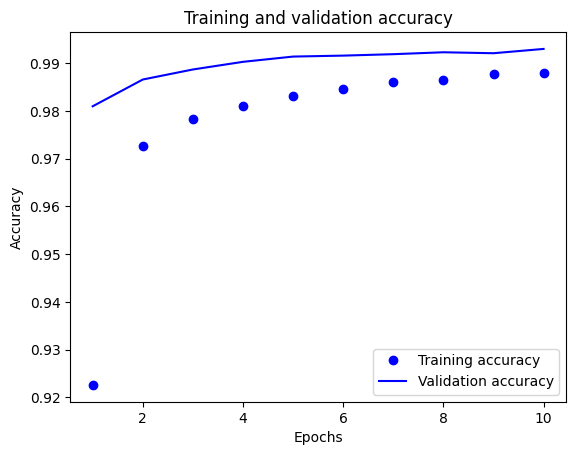

In [120]:
import matplotlib.pyplot as plt

# Obtener la historia de entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Graficar pérdida
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficar precisión
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
print('Esta imagen es un: ', y_test_mnist[4].argmax())
test = X_test_mnist[4].reshape(1, 28, 28, 1)
print('Predicción:', model_1.predict(test).argmax() )

Esta imagen es un:  4
1/1 [==============================] - 0s 281ms/step
Predicción: 4


In [127]:
# Imagenes externas

from PIL import Image
import numpy as np

# Cargar la imagen
imagen = Image.open('./data/images/prueba2.png')

# Convertir la imagen a escala de grises si es necesario
imagen_gris = imagen.convert('L')

# Convertir la imagen a un arreglo NumPy
imagen_array = np.array(imagen_gris)

# Normalizar los valores de píxeles al rango [0, 1]
imagen_array = imagen_array / 255.0

# Agregar una dimensión para que coincida con la forma de entrada del modelo (28x28x1)
imagen_array = np.expand_dims(imagen_array, axis=-1)

# Agregar una dimensión adicional para el lote si es necesario (1 en este caso)
imagen_array = np.expand_dims(imagen_array, axis=0)


print( 'Predicción:', model_1.predict(imagen_array).argmax() )

1/1 [==============================] - 0s 47ms/step
Predicción: 4


## Ejercicio 2 - Natural Language Processing: Sentiment Analysis

**Consigna:** Construí y entrená una arquitectura BERT para resolver el problema de Sentiment Analysis del dataset de reviews de apps de Google Play. 
En lugar de predecir las clases de 1 a 5 convertilo en un problema de 3 clases donde: 1 y 2 = detractores, 3 = neutrales, 4 y 5 = promotores.

* Enfocate en explicar los distintos pasos del proceso y la teoría detrás de la utilización de un modelo preentrenado para resolver una tarea específica.
* El dataset y ejemplos de resolución los encontrarás en el siguiente link: 
https://www.kaggle.com/datasets/prakharrathi25/google-play-store-reviews

**Adjunto resolución en Google Collab por problemas técnicos mencionados en el vídeo:**


[**RESOLUCION DEL PROBLEMA**](https://colab.research.google.com/drive/16ak6SUTxYQNMPld2bEUD2bxlh7n-Wujz?usp=sharing)

In [1]:
# Importación de librerias

# Modelado

from transformers import BertModel, BertTokenizer
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

# Limpieza/depuración dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Cargamos el dataset

df = pd.read_csv('./data/reviews.csv')
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo


In [3]:
# Veremos la cantidad de nulos por clase en score y content que son los campos más relevantes en nuestro caso

print('Nulos en content: ', df['score'].isna().sum() )

print('Nulos en score: ',  df['content'].isna().sum() )


Nulos en content:  0
Nulos en score:  0


In [4]:
# Unimos las clases para que sean 3 donde 1 = detractores, 2 neutrales y 3 promotores (NOS AHORRAMOS REETIQUETARLO NUEVAMENTE AL ESCRIBIRLO NUMERICAMENTE DESDE AHORA)

# Clases

print('Viejas clases',  df.score.unique() )

def classifier(i):
    
    if i < 3:
        return 0
    
    elif i == 3:
        return 1
    
    else:
        return 2
    
df['score'] = df['score'].apply(classifier)

# Nuevas clases

print('Nuevas clases', df['score'].unique()) 


Viejas clases [1 2 3 4 5]
Nuevas clases [0 1 2]


In [5]:
# Revisamos la cantidad de muestras de cada clase

df['score'].value_counts()

score
3    5654
1    4850
2    1991
Name: count, dtype: int64

In [6]:
# Equiparamos un poco la proporción pero en caso de dar resultados no tan buenos probaremos usando el set completo a pesar de la desproporción

# Otra opción seríamos buscar más datos clasificados como neutrales o darle un mayor peso a la clase neutral para equiparar la diferencia de proporción

clase_1 = df[df['score'] == 0].sample(2000)

clase_3 = df[df['score'] == 2].sample(2000)

df_aux = df[df['score'] == 1]

df = pd.concat([df_aux, clase_1, clase_3])

df['score'].value_counts()


score
0    2000
2    2000
1    1991
Name: count, dtype: int64

In [4]:
# Equiparamos un poco la proporción pero en caso de dar resultados no tan buenos probaremos usando el set completo a pesar de la desproporción

# Otra opción seríamos buscar más datos clasificados como neutrales o darle un mayor peso a la clase neutral para equiparar la diferencia de proporción

clase_1 = df[df['score'] == 1].sample(1000)

clase_3 = df[df['score'] == 3].sample(1000)

df_aux = df[df['score'] == 2].sample(1000)

df = pd.concat([df_aux, clase_1, clase_3])

# Tokenización (formateo en vectores/ embedding)

In [7]:
# Traemos el tokenizador de Bert

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [6]:
# Ejemplo de lo que hará luego el modelo (cómo se recibirá ese texto)

sample_txt = df['content'].values[0]
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print('Frase: ', sample_txt)
print('Tokens: ', tokens)
print('Tokens numéricos: ', token_ids)

# Ejemplo para mostrar como ingresan al modelo los textos

encoding = tokenizer.encode_plus(
    sample_txt,
    max_length = 8,
    truncation = True,
    add_special_tokens = True,
    return_token_type_ids = False,
    return_attention_mask = True,
    padding= True,
    return_tensors = 'pt'
)

print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))
print(encoding['input_ids'][0])
print(encoding['attention_mask'][0])




Frase:  Would have rated five stars if not for the ads and task option. Easy to use, numerous options for reminders, frequency, and snooze time. It would be convenient if the task selection could be selected from the date and time setting page. Ad frequency and placement have increased - an ad for pills just popped up after selecting a snooze option. This is creepy.
Tokens:  ['Would', 'have', 'rated', 'five', 'stars', 'if', 'not', 'for', 'the', 'ads', 'and', 'task', 'option', '.', 'Easy', 'to', 'use', ',', 'numerous', 'options', 'for', 'reminder', '##s', ',', 'frequency', ',', 'and', 's', '##no', '##oz', '##e', 'time', '.', 'It', 'would', 'be', 'convenient', 'if', 'the', 'task', 'selection', 'could', 'be', 'selected', 'from', 'the', 'date', 'and', 'time', 'setting', 'page', '.', 'Ad', 'frequency', 'and', 'placement', 'have', 'increased', '-', 'an', 'ad', 'for', 'pills', 'just', 'popped', 'up', 'after', 'selecting', 'a', 's', '##no', '##oz', '##e', 'option', '.', 'This', 'is', 'creepy',

In [7]:
# Vamos a buscar una buena longitud para los tokens, buscando no perder información útil pero tampoco encarecer el costo computacional innecesariamente

# Tomamos la longitud de cada review y la almacenamos usando la longitud máxima para evitar errores

token_lenght = []


for txt in df.content:
    tokens = tokenizer.encode(txt, truncation=True, max_length=512)
    token_lenght.append(len(tokens))
    

Text(0.5, 0, 'Token count')

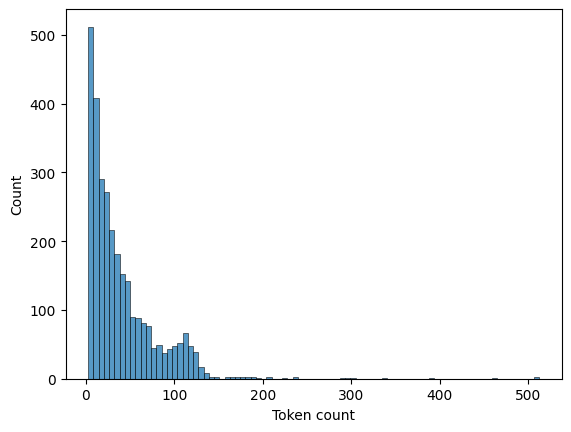

In [8]:
# Graficamos la distribución de los tokens

sns.histplot(token_lenght)
plt.xlabel('Token count')

In [8]:
# Definimos variables para el entrenamiento del modelo

MAX_LEN = 50
BATCH_SIZE = 8
NUM_WORKERS = 10
NCLASSES = 3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [9]:
# Creación de clase Dataset para utilizarla luego en pytorch

class ReviewsDataset(Dataset):
  
  # Definir constructor y métodos necesarios de la clase
  def __init__(self,reviews,labels,tokenizer,max_len):
      
    self.reviews = reviews
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
      return len(self.reviews)
    
  def __getitem__(self, item):
    review = str(self.reviews[item])
    label = self.labels[item]
    
    # Definir el formato en el que se retornará cada review antes de entrar al modelo
    
    encoding = tokenizer.encode_plus(
        review,
        max_length = self.max_len,
        truncation = True,
        add_special_tokens = True,
        return_token_type_ids = False,
        pad_to_max_length = True,
        return_attention_mask = True,
        return_tensors = 'pt'
        )
    

    return {
          'review': review,
          'input_ids': encoding['input_ids'].flatten(),
          'attention_mask': encoding['attention_mask'].flatten(),
          'label': torch.tensor(label, dtype=torch.long)
      } 


In [10]:
# Definimos nuestro Data loader:

def data_loader(df, tokenizer, max_len, batch_size):
  dataset = ReviewsDataset(
      reviews = df.content.to_numpy(),
      labels = df.score.to_numpy(),
      tokenizer = tokenizer,
      max_len = MAX_LEN
  )

  return DataLoader(dataset, batch_size = BATCH_SIZE, num_workers = NUM_WORKERS)

In [11]:
# Separamos los set de entrenamiento y validacion

df_train, df_test = train_test_split(df, test_size = 0.20)

train_data_loader = data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [12]:
# Creamos el modelo, lo inicializamos y luego visualizaremos su estructura

class BERTSentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(BERTSentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME,  return_dict=False)
    self.drop = nn.Dropout(p=0.4)
    self.linear = nn.Linear(self.bert.config.hidden_size, n_classes)

# Podemos apreciar a gran escala las capas en forward

  def forward(self, input_ids, attention_mask):
    _, cls_output = self.bert(
        input_ids = input_ids,
        attention_mask = attention_mask
    )
    drop_output = self.drop(cls_output)
    output = self.linear(drop_output)
    return output

model = BERTSentimentClassifier(NCLASSES)
model = model.to(device)

model

BERTSentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, eleme

In [13]:
# Haremos elección de los párametros del entrenamiento en nuestro caso utilizaremos: AdamW como optimizador y Categorical Cross Entropy Loss

EPOCHS = 1
optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_data_loader) * EPOCHS
loss_fn = nn.CrossEntropyLoss().to(device)

In [14]:
# Definimos la función de entrenamiento y validación

def train_model(model, data_loader, loss_fn, optimizer, device, n_examples):
    
# Activamos el modo entrenamiento y almacenamos el error en nuestra variable losses

  model = model.train()
  losses = []
  correct_predictions = 0
  
  
  for n, batch in enumerate(data_loader):

      
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['label'].to(device)
    
    outputs = model(input_ids = input_ids, attention_mask = attention_mask)
    _, preds = torch.max(outputs, dim=1)
    
    loss = loss_fn(outputs, labels)
    
    # Calculamos las predicciones correctas y agregamos la pérdida a nuestra lista para buscar luego la pérdida media
    
    correct_predictions += torch.sum(preds == labels)
    losses.append(loss.item())
    
    # Propagamos el error para ajustar los pesos y reiniciamos los gradientes para la siguiente iteración
    
    loss.backward()
    optimizer.step(),
    optimizer.zero_grad()
    
  return correct_predictions.double()/n_examples, np.mean(losses)


def eval_model(model, data_loader, loss_fn, device, n_examples):

# Activamos el modo evaluación
  model = model.eval()
  losses = []
  correct_predictions = 0

# Evitamos cambiar los pesos del modelo, solo testeamos su desempeño

  with torch.no_grad():

    for batch in data_loader:

      input_ids = batch['input_ids'].to(device)
      attention_mask = batch['attention_mask'].to(device)
      labels = batch['label'].to(device)

      outputs = model(input_ids = input_ids, attention_mask = attention_mask)
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, labels)

      correct_predictions += torch.sum(preds == labels)
      losses.append(loss.item())

  return correct_predictions.double()/n_examples, np.mean(losses)



In [15]:
# Entrenamiento

for epoch in range(EPOCHS):
    
  print('Epoch {} de {}'.format(epoch+1, EPOCHS))
  print('------------------------------------------------------------')
  train_acc, train_loss = train_model(
      model, train_data_loader, loss_fn, optimizer, device, len(df_train)
  )
  
  
  test_acc, test_loss = eval_model(
      model, test_data_loader, loss_fn, device, len(df_test)
  )
  print('Entrenamiento: Loss: {}, accuracy: {}'.format(train_loss, train_acc))
  print('Validación: Loss: {}, accuracy: {}'.format(test_loss, test_acc))
  print('')

Epoch 1 de 1
------------------------------------------------------------


## Ejercicio 3 - Computer Vision: Autoencoder from scratch

**Consigna:** Algunas veces no tenemos disponibles las etiquetas del conjunto de datos con el que queremos entrenar. En esas situaciones es importante trabajar con la información disponible para lograr el resultado deseado. El aprendizaje no supervisado es un proxy excelente para comprender información no etiquetada. 
Construí y entrená una arquitectura Autoencoder convolucional con el dataset MNIST cargado previamente. Extraé la salida del Encoder y graficala en un scatterplot con alguna técnica de reducción de dimensionalidad de tu preferencia. 

Luego explicar en el video: 
* ¿Por qué se llega a este resultado? ¿Cómo se relaciona con la arquitectura Autoencoder?
* ¿Cómo podríamos utilizar esta técnica en un entorno real? [Opcional]


In [37]:
# Por comodidad utilizaremos las imágenes ya depuradas anteriormente y pasaremos directamente a la construcción del Autoencoder

from keras.layers import Input, Conv2DTranspose

input = Input(shape=(28, 28, 1))

# Fragmento del Encoder

x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
encoder_output = MaxPooling2D((2, 2), padding="same")(x)

# Fragmento decoder Decoder

x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoder_output)
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
decoder_output = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

encoder = keras.Model(input, encoder_output)
# Autoencoder
autoencoder = keras.Model(input, decoder_output)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose_12 (Conv2  (None, 14, 14, 32)        924

In [21]:
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.models import Model

# Encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2DTranspose(8, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Modelo del Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Modelo del Encoder
encoder = Model(input_img, encoded)

In [38]:
history = autoencoder.fit(X_train_mnist, X_train_mnist,
                epochs= 3,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test_mnist, X_test_mnist))

Epoch 1/3
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0878 - val_loss: 0.0683
Epoch 2/3
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0678 - val_loss: 0.0663
Epoch 3/3
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0663 - val_loss: 0.0655


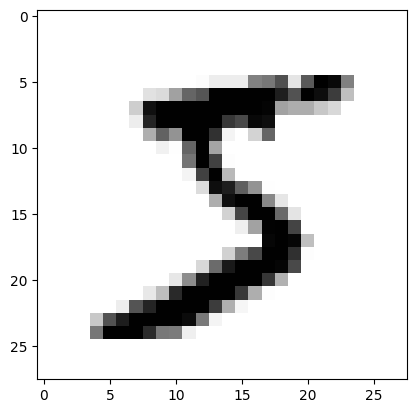

In [26]:
plt.imshow( X_train_mnist[0] , cmap = 'gray_r')

1/1 [==============================] - 0s 213ms/step

 Forma en la que llega: (28, 28, 4, 1)


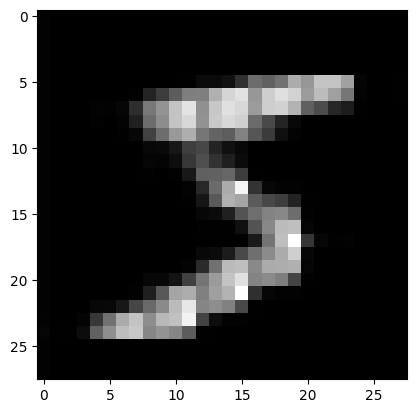

In [60]:
new_image = autoencoder.predict(X_train_mnist[0])

print('\n Forma en la que llega:', new_image.shape)

# La llevamos al formato original

#new_image = new_image[:, :, 0, 0]

plt.imshow( new_image[:, :, 0, 0] , cmap = 'gray')
    


In [39]:
new_image = autoencoder.predict(X_train_mnist[0])

print('\n Forma en la que llega:', new_image.shape)

# La llevamos al formato original

1/1 [==============================] - 0s 137ms/step

 Forma en la que llega: (28, 28, 4, 1)


1/1 [==============================] - 0s 31ms/step
(28, 7, 1, 32)


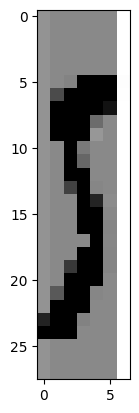

In [57]:
new_representation = encoder.predict([X_train_mnist[0]])

print( new_representation.shape )

#new_representation = new_representation[:, :, 0, 0]

plt.imshow( new_representation[:, :, 0, 0] , cmap = 'gray')
    

In [66]:
new_representation.shape

(28, 7, 1, 32)

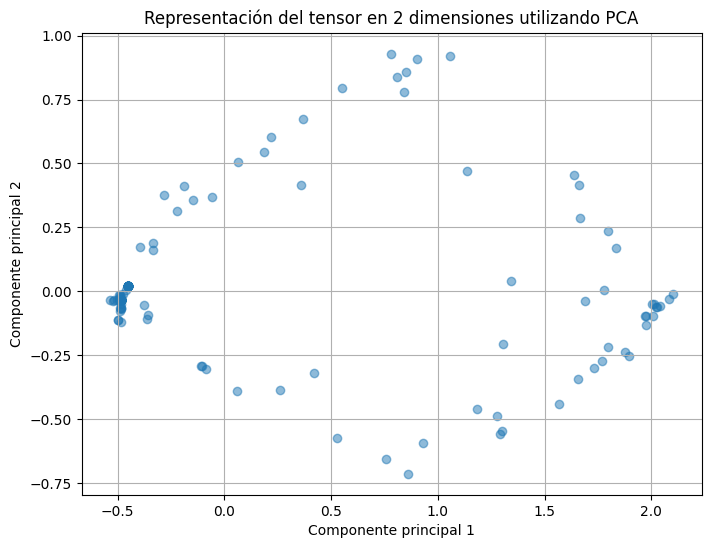

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


tensor = new_representation

# Remodelar el tensor para que sea compatible con PCA
tensor_reshaped = tensor.reshape(-1, 32)

# Reducción de dimensionalidad utilizando PCA a 2 dimensiones
pca = PCA(n_components=2)
tensor_pca = pca.fit_transform(tensor_reshaped)

# Plotear los puntos en un gráfico 2D
plt.figure(figsize=(8, 6))
plt.scatter(tensor_pca[:, 0], tensor_pca[:, 1], alpha=0.5)
plt.title('Representación del tensor en 2 dimensiones utilizando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid(True)
plt.show()

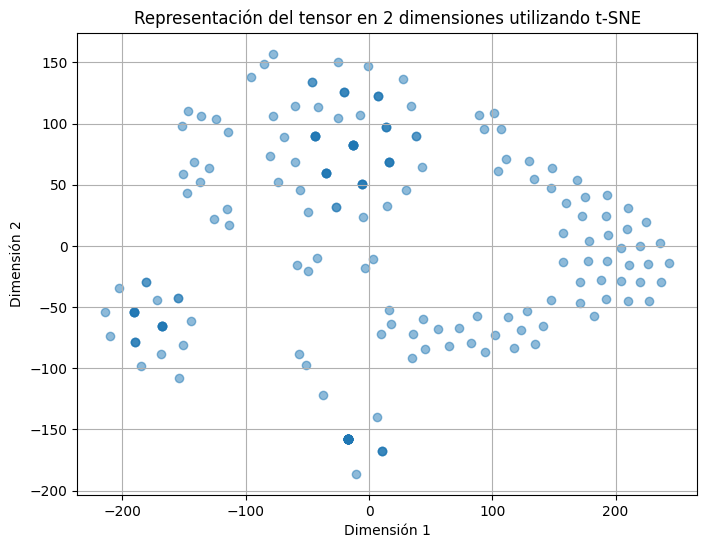

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tensor = new_representation

# Remodelar el tensor para que sea compatible con t-SNE
tensor_reshaped = tensor.reshape(-1, 32)

# Reducción de dimensionalidad utilizando t-SNE a 2 dimensiones
tsne = TSNE(n_components=2)
tensor_tsne = tsne.fit_transform(tensor_reshaped)

# Plotear los puntos en un gráfico 2D
plt.figure(figsize=(8, 6))
plt.scatter(tensor_tsne[:, 0], tensor_tsne[:, 1], alpha=0.5)
plt.title('Representación del tensor en 2 dimensiones utilizando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 29ms/step
4


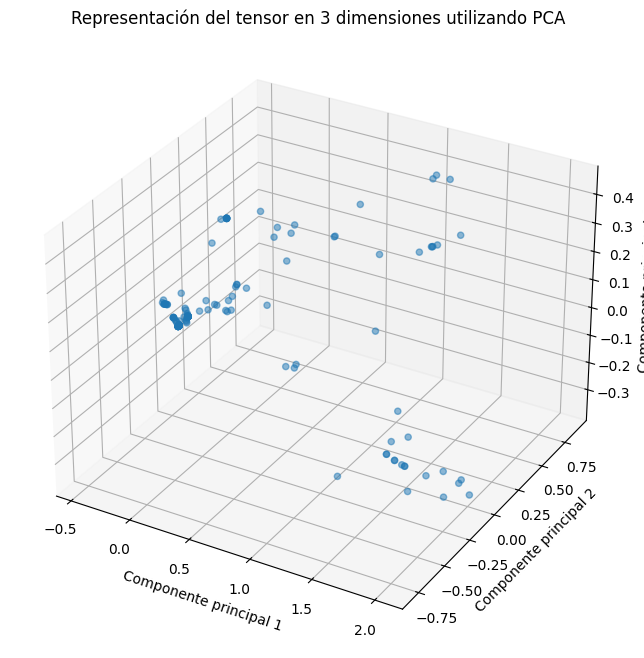

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


tensor = encoder.predict([X_train_mnist[2]])
print(y_train_mnist[2].argmax())

# Remodelar el tensor para que sea compatible con PCA
tensor_reshaped = tensor.reshape(-1, 32)

# Reducción de dimensionalidad utilizando PCA a 3 dimensiones
pca = PCA(n_components=3)
tensor_pca = pca.fit_transform(tensor_reshaped)

# Plotear los puntos en un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tensor_pca[:, 0], tensor_pca[:, 1], tensor_pca[:, 2], alpha=0.5)
ax.set_title('Representación del tensor en 3 dimensiones utilizando PCA')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
plt.show()

1/1 [==============================] - 0s 25ms/step


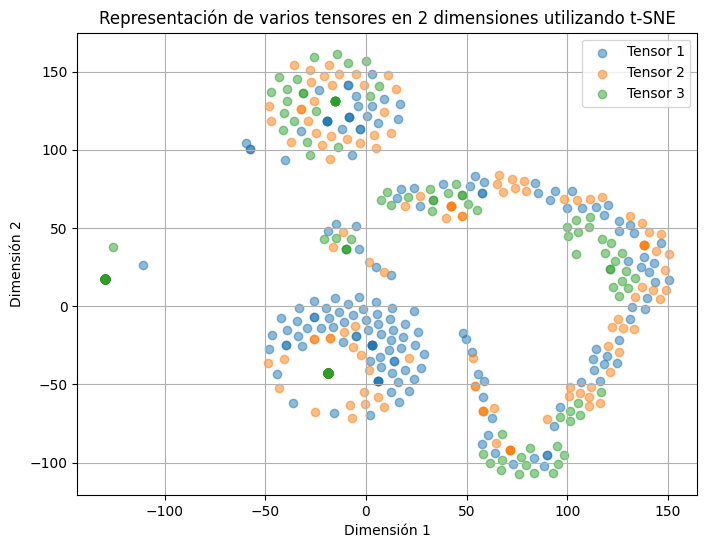

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

num_tensores = 3  
#tensores = [encoder.predict([X_train_mnist[i]]) for i in range(num_tensores)]  # Simulación de datos aleatorios

tensores = [encoder.predict([X_train_mnist[3]]), encoder.predict([X_train_mnist[6]]), encoder.predict([X_train_mnist[8]]) ] 


# Remodelar los tensores para que sean compatibles con t-SNE
tensores_reshaped = np.concatenate([tensor.reshape(-1, 32) for tensor in tensores])

# Reducción de dimensionalidad utilizando t-SNE a 2 dimensiones
tsne = TSNE(n_components=2)
tensores_tsne = tsne.fit_transform(tensores_reshaped)

# Plotear los puntos en un gráfico 2D
plt.figure(figsize=(8, 6))
for i in range(num_tensores):
    inicio = i * (28 * 7)
    fin = inicio + (28 * 7)
    plt.scatter(tensores_tsne[inicio:fin, 0], tensores_tsne[inicio:fin, 1], alpha=0.5, label=f'Tensor {i+1}')
plt.title('Representación de varios tensores en 2 dimensiones utilizando t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 26ms/step


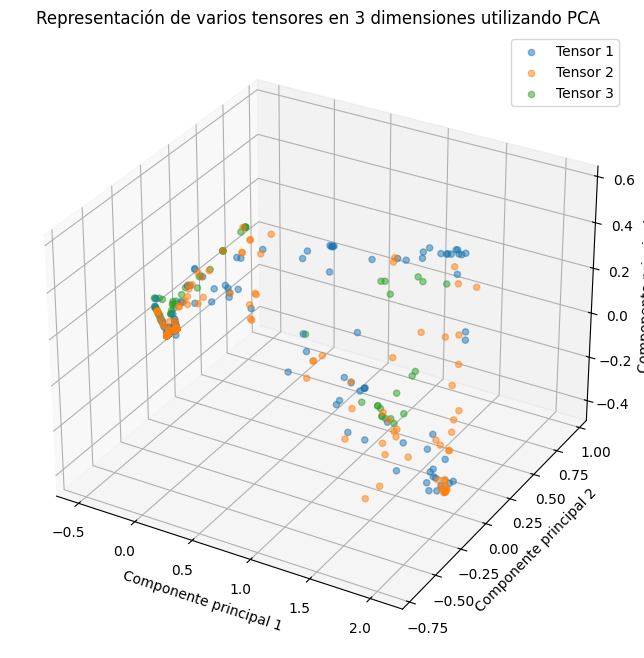

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

num_tensores = 3  
#tensores = [encoder.predict([X_train_mnist[i]]) for i in range(num_tensores)]  # Simulación de datos aleatorios

tensores = [encoder.predict([X_train_mnist[1]]), encoder.predict([X_train_mnist[7]]), encoder.predict([X_train_mnist[8]]) ] 


# Remodelar los tensores para que sean compatibles con PCA
tensores_reshaped = np.concatenate([tensor.reshape(-1, 32) for tensor in tensores])

# Reducción de dimensionalidad utilizando PCA a 3 dimensiones
pca = PCA(n_components=3)
tensores_pca = pca.fit_transform(tensores_reshaped)

# Plotear los puntos en un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(num_tensores):
    inicio = i * (28 * 7)
    fin = inicio + (28 * 7)
    ax.scatter(tensores_pca[inicio:fin, 0], tensores_pca[inicio:fin, 1], tensores_pca[inicio:fin, 2], alpha=0.5, label=f'Tensor {i+1}')
ax.set_title('Representación de varios tensores en 3 dimensiones utilizando PCA')
ax.set_xlabel('Componente principal 1')
ax.set_ylabel('Componente principal 2')
ax.set_zlabel('Componente principal 3')
ax.legend()
plt.show()

1/1 [==============================] - 0s 28ms/step


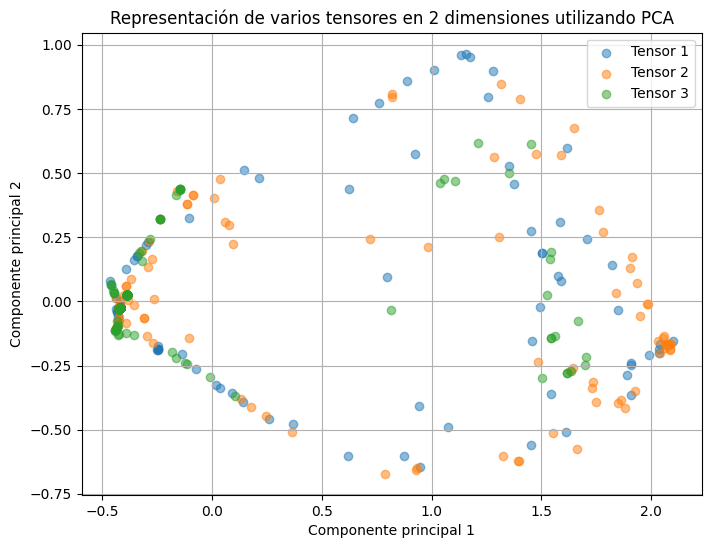

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


num_tensores = 3 
tensores = [encoder.predict([X_train_mnist[i]]) for i in range(num_tensores)]  

tensores = [encoder.predict([X_train_mnist[4]]), encoder.predict([X_train_mnist[7]]), encoder.predict([X_train_mnist[8]]) ] 


# Remodelar los tensores para que sean compatibles con PCA
tensores_reshaped = np.concatenate([tensor.reshape(-1, 32) for tensor in tensores])

# Reducción de dimensionalidad utilizando PCA a 2 dimensiones
pca = PCA(n_components=2)
tensores_pca = pca.fit_transform(tensores_reshaped)

# Plotear los puntos en un gráfico 2D
plt.figure(figsize=(8, 6))
for i in range(num_tensores):
    inicio = i * (28 * 7)
    fin = inicio + (28 * 7)
    plt.scatter(tensores_pca[inicio:fin, 0], tensores_pca[inicio:fin, 1], alpha=0.5, label=f'Tensor {i+1}')
plt.title('Representación de varios tensores en 2 dimensiones utilizando PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.grid(True)
plt.show()

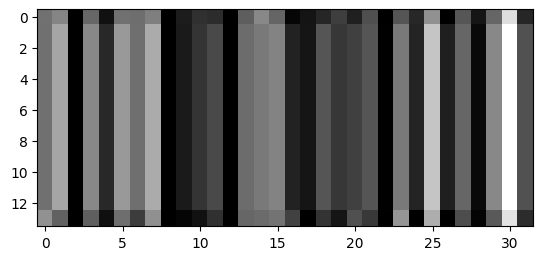

In [36]:
plt.imshow( new_representation[0] , cmap = 'gray')